# Customer Analysis Project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## End-to-End Analysis in One Notebook

In [7]:
# Step 1: Create sample customer dataset
customer_data = {
    'Customer_ID': [101, 102, 103, 104, 105, 106, 107, 108],
    'Age': [25, 32, 45, 28, 51, 36, 42, 29],
    'City': ['NYC', 'LA', 'Chicago', 'NYC', 'Miami', 'LA', 'Chicago', 'NYC'],
    'Total_Spent': [1200, 800, 2100, 950, 3200, 1100, 1800, 750],
    'Visits_Per_Month': [4, 2, 6, 3, 8, 4, 5, 2],
    'Satisfaction': [4.2, 3.8, 4.5, 4.1, 4.8, 4.0, 4.3, 3.9]
}

customers = pd.DataFrame(customer_data)
print("CUSTOMER DATASET:")
print(customers)

CUSTOMER DATASET:
   Customer_ID  Age     City  Total_Spent  Visits_Per_Month  Satisfaction
0          101   25      NYC         1200                 4           4.2
1          102   32       LA          800                 2           3.8
2          103   45  Chicago         2100                 6           4.5
3          104   28      NYC          950                 3           4.1
4          105   51    Miami         3200                 8           4.8
5          106   36       LA         1100                 4           4.0
6          107   42  Chicago         1800                 5           4.3
7          108   29      NYC          750                 2           3.9


### Data Analysis & Insights

In [8]:
# Basic analysis
print("=== CUSTOMER ANALYSIS INSIGHTS ===")
print(f"Total Customers: {len(customers)}")
print(f"Average Age: {customers['Age'].mean():.1f} years")
print(f"Total Revenue: ${customers['Total_Spent'].sum():,.2f}")
print(f"Average Spending: ${customers['Total_Spent'].mean():.2f}")
print(f"Average Satisfaction: {customers['Satisfaction'].mean():.1f}/5.0")

# Group by city for geographic analysis
city_analysis = customers.groupby('City').agg({
    'Total_Spent': 'sum',
    'Customer_ID': 'count',
    'Satisfaction': 'mean'
}).rename(columns={'Customer_ID': 'Customer_Count', 'Total_Spent': 'Total_Revenue'})

city_analysis['Average_Spending'] = city_analysis['Total_Revenue'] / city_analysis['Customer_Count']

print("\n=== PERFORMANCE BY CITY ===")
print(city_analysis)

=== CUSTOMER ANALYSIS INSIGHTS ===
Total Customers: 8
Average Age: 36.0 years
Total Revenue: $11,900.00
Average Spending: $1487.50
Average Satisfaction: 4.2/5.0

=== PERFORMANCE BY CITY ===
         Total_Revenue  Customer_Count  Satisfaction  Average_Spending
City                                                                  
Chicago           3900               2      4.400000       1950.000000
LA                1900               2      3.900000        950.000000
Miami             3200               1      4.800000       3200.000000
NYC               2900               3      4.066667        966.666667


### Visualization for the Project

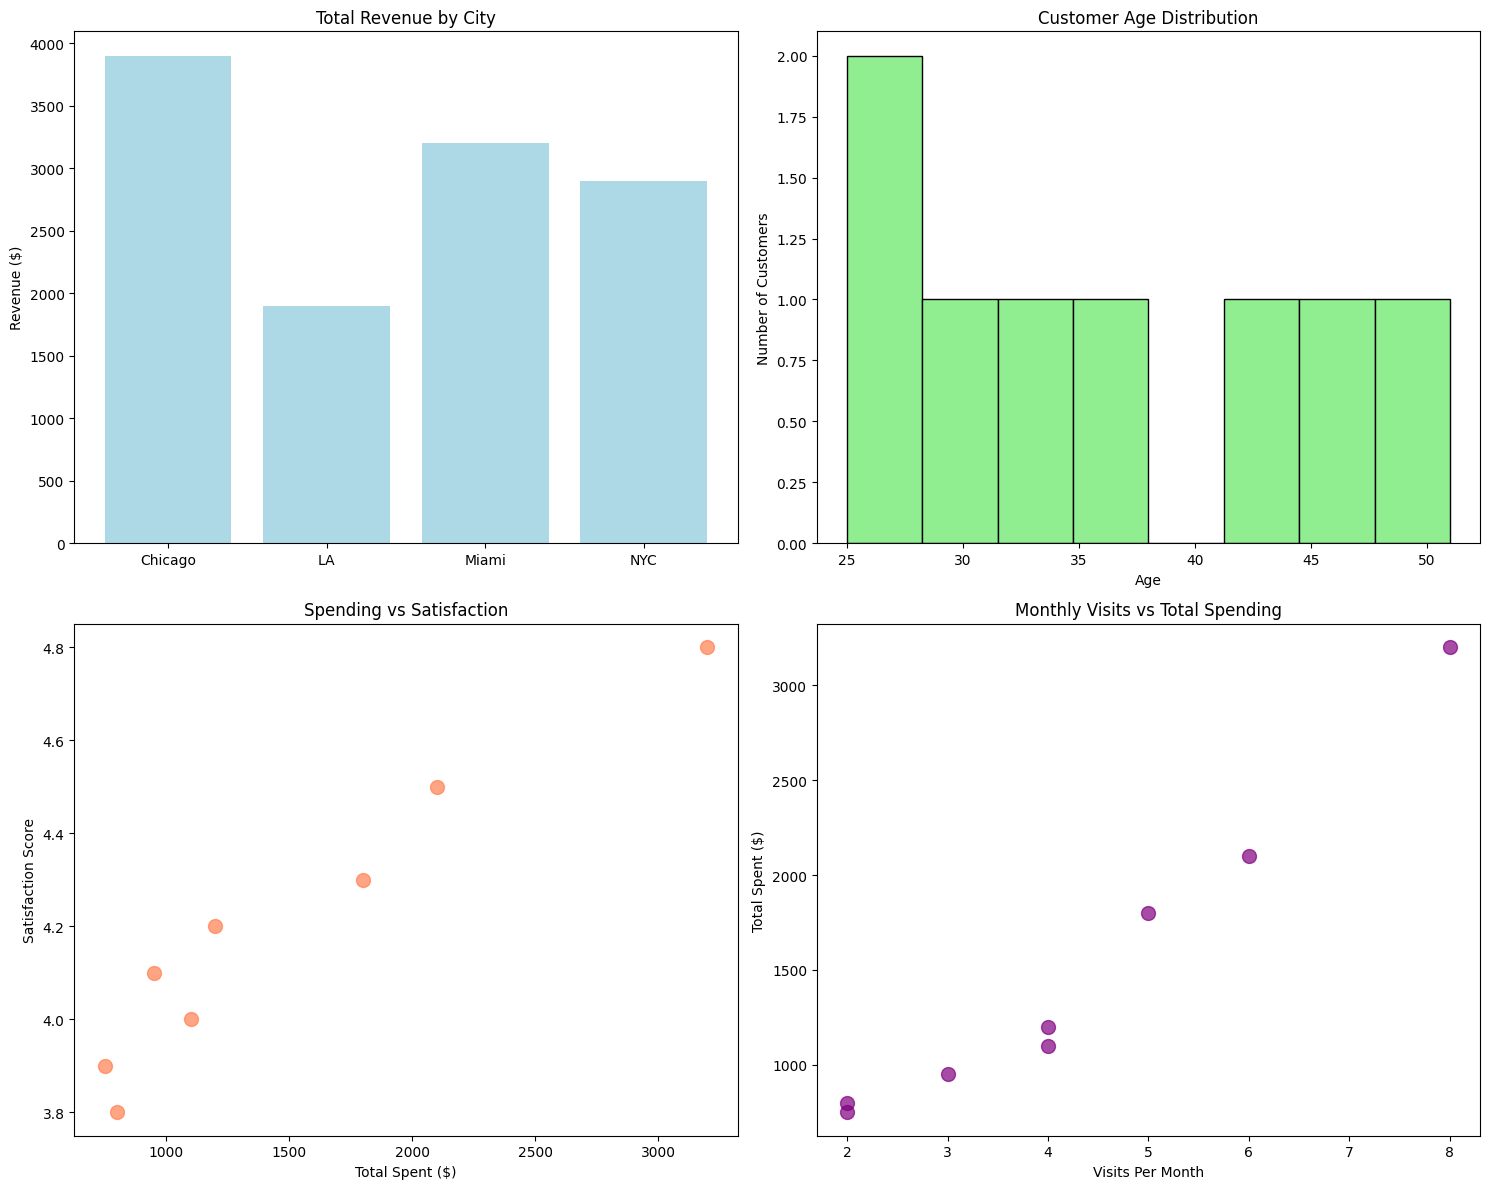

In [9]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Revenue by City
city_revenue = customers.groupby('City')['Total_Spent'].sum()
axes[0,0].bar(city_revenue.index, city_revenue.values, color='lightblue')
axes[0,0].set_title('Total Revenue by City')
axes[0,0].set_ylabel('Revenue ($)')

# 2. Age Distribution
axes[0,1].hist(customers['Age'], bins=8, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Customer Age Distribution')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Number of Customers')

# 3. Spending vs Satisfaction
axes[1,0].scatter(customers['Total_Spent'], customers['Satisfaction'], 
                 s=100, alpha=0.7, color='coral')
axes[1,0].set_title('Spending vs Satisfaction')
axes[1,0].set_xlabel('Total Spent ($)')
axes[1,0].set_ylabel('Satisfaction Score')

# 4. Visits vs Spending
axes[1,1].scatter(customers['Visits_Per_Month'], customers['Total_Spent'], 
                 s=100, alpha=0.7, color='purple')
axes[1,1].set_title('Monthly Visits vs Total Spending')
axes[1,1].set_xlabel('Visits Per Month')
axes[1,1].set_ylabel('Total Spent ($)')

plt.tight_layout()
plt.show()

### Key Insights Summary

In [10]:
# Generate automated insights
print("=== KEY BUSINESS INSIGHTS ===")

# Find best performing city
best_city = city_analysis['Total_Revenue'].idxmax()
print(f"📍 Highest revenue city: {best_city} (${city_analysis.loc[best_city, 'Total_Revenue']:,.2f})")

# Customer segmentation by spending
high_value = customers[customers['Total_Spent'] > 1500]
print(f"👑 High-value customers (>$1500): {len(high_value)} customers")

# Correlation analysis
correlation = customers['Total_Spent'].corr(customers['Satisfaction'])
print(f"📊 Spending-Satisfaction correlation: {correlation:.2f}")

# Average metrics
print(f"📈 Average monthly visits: {customers['Visits_Per_Month'].mean():.1f}")
print(f"⭐ Average satisfaction: {customers['Satisfaction'].mean():.1f}/5.0")

=== KEY BUSINESS INSIGHTS ===
📍 Highest revenue city: Chicago ($3,900.00)
👑 High-value customers (>$1500): 3 customers
📊 Spending-Satisfaction correlation: 0.96
📈 Average monthly visits: 4.2
⭐ Average satisfaction: 4.2/5.0
